This is one of the challenges in Kaggle

https://www.kaggle.com/c/titanic

Description of the data is here

https://www.kaggle.com/c/titanic/data

Please create an account in Kaggle, run through this exercise and submit your solution

From (https://www.kaggle.com/c/titanic/data)

Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
def readTrainData():
    import pandas as pd
    df = pd.read_csv('train.csv')
    return df

# readTrainData()

In [2]:
def readDataToPredict():
    import pandas as pd
    df = pd.read_csv('test.csv')
    return df

# readDataToPredict()

In [ ]:
def printHeader():
    print(readTrainData().head(10))
    
printHeader()

In [4]:
def cleanTrainData():
    from sklearn import preprocessing
    
    df = readTrainData()
    
    # port of embark
    df['Embarked'].fillna('R',inplace=True)
    
    # default the age to zero when not present
    df['Age'].fillna(0,inplace=True)
    
    df['Cabin'].fillna('N',inplace=True)
    # extract the first character of the cabin
    df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[:1])

    # when a fare is not present use the mean for all the fares
    df['Fare'].fillna(df['Fare'].mean(),inplace=True)
    
    # change the labels to numbers
    leSex = preprocessing.LabelEncoder()
    leSex.fit(df['Sex'])
    df['EncSex'] = leSex.transform(df['Sex'])
    
    leEmb = preprocessing.LabelEncoder()
    leEmb.fit(df['Embarked'])
    df['EncEmbarked'] = leEmb.transform(df['Embarked'])
    
    leCab = preprocessing.LabelEncoder()
    leCab.fit(df['Cabin'])
    df['EncCabin'] = leCab.transform(df['Cabin'])
    
    # dropping passenger name and ticket
    X = df[['Pclass','Age','SibSp','Parch','Fare','EncSex','EncEmbarked','EncCabin']]
    y = df['Survived']
    return(X,y)


In [ ]:
def cleanPredictDataSameAsTrain():
    
    from sklearn import preprocessing
    
    df = readTrainData()
    df_predict = readDataToPredict()
    
#     train
    df['Embarked'].fillna('R',inplace=True)
    df['Age'].fillna(0,inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[:1])
    df['Fare'].fillna(df['Fare'].mean(),inplace=True)
    
#     test
    df_predict['Embarked'].fillna('R',inplace=True)
    df_predict['Age'].fillna(0,inplace=True)
    df_predict['Cabin'].fillna('N',inplace=True)
    df_predict['Cabin'] = df_predict['Cabin'].apply(lambda x: str(x)[:1])
    df_predict['Fare'].fillna(df_predict['Fare'].mean(),inplace=True)
    
    leSex = preprocessing.LabelEncoder()
    leSex.fit(df['Sex'])
    df_predict['EncSex'] = leSex.transform(df_predict['Sex'])
    
    leEmb = preprocessing.LabelEncoder()
    leEmb.fit(df['Embarked'])
    df_predict['EncEmbarked'] = leEmb.transform(df_predict['Embarked'])
    
    leCab = preprocessing.LabelEncoder()
    leCab.fit(df['Cabin'])
    df_predict['EncCabin'] = leCab.transform(df_predict['Cabin'])
    
    X = df_predict[['Pclass','Age','SibSp','Parch','Fare','EncSex','EncEmbarked','EncCabin']]
    return(X,df_predict['PassengerId'])

In [ ]:
def getDummyClassifier():
    from sklearn.dummy import DummyClassifier
    from sklearn.model_selection import train_test_split
    
    (X,y) = cleanTrainData()
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    dummy = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
    return (dummy.score(X_train, y_train),dummy.score(X_test, y_test))
    
getDummyClassifier()

In [ ]:
# create as many cells as needed to run through different classifiers
# some of the ones you can try are LinearClassifier, RandomForest, AdaBoostClassifier, DecisionTreeClassifier, SVC,
# Neural Net (MLPClassifier), GradientBoostingClassifier, etc.
# make sure to use GridSearchCV to find the optimal parameters
# to improve your score, you can
# try to incorporate the name of the person
# maybe defaulting the age to zero is not such a good idea
# try to incorporate the ticket somehow as an extra feature
# read the forums in kaggle for that challenge
# have fun!

In [ ]:
#put your best model here:
def runFinalModelAndCreateFile():
    import pandas as pd    
    from sklearn.model_selection import train_test_split
    from sklearn.dummy import DummyClassifier 
    
    (X,y) = cleanTrainData()
    (X_predict,passId) = cleanPredictDataSameAsTrain()

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

    myModel = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
    print (myModel.score(X_train, y_train),myModel.score(X_test, y_test))

    results = pd.concat([passId,pd.Series(myModel.predict(X_predict))],axis=1)
    results.columns = ['PassengerId','Survived']
    results.to_csv('submit.csv',index=False) 
#     rommel's score after submission to Kaggle: .77033
    
runFinalModelAndCreateFile()

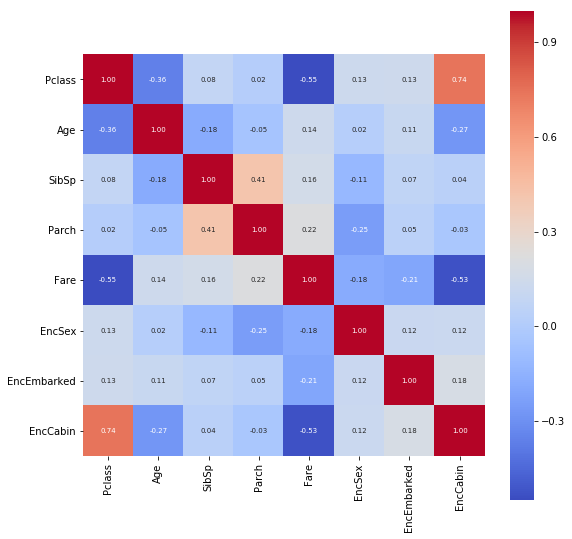

In [13]:
# the following is useful to see if features are correlated
# 1 is that they are totally correlated, 0 is that they are not correlated at all, 
# -1 is that they are negatively correlated (one is the opposite of the other)
# if features are highly correlated (close to 1), you can remove a feature without 
# affecting the score
# e.g if calculating the price of a house and one feature is 'number of bedrooms', and the other
# feature is 'twice the number of bedrooms' they are correlated and the second doesn't add any
# extra information so it should be removed
def plotHeatMap():
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    (X,y) = cleanTrainData()
    corr = X.corr()
    plt.figure(figsize=(9,9))
    sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 7},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'coolwarm')
    plt.savefig('heatmap.png')
    plt.show()
    

plotHeatMap()

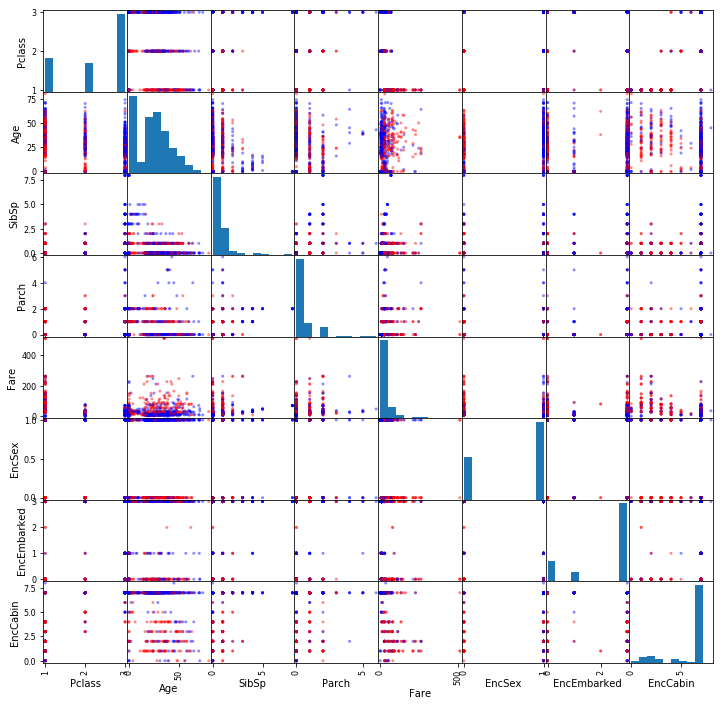

In [14]:
# it's a good idea to remove features that are not separatable
def plotRelationships():
    
    import pandas as pd
    from pandas.plotting import scatter_matrix
    import matplotlib.pyplot as plt
    
    (X,y) = cleanTrainData()
    color_function = {0: "blue", 1: "red"}
    colors = y.map(lambda x: color_function.get(x))
    scatter_matrix(X, c=colors, alpha = 0.45, figsize = (12, 12), diagonal='hist')
    plt.savefig('scatter.png')
    plt.show()
    
    
plotRelationships()